<a href="https://colab.research.google.com/github/docty/machine_learning/blob/main/heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# EDA Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learing (classification models) Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('sample_data/heart.csv')

In [3]:
# Determine the shape of the dataset
print('Shape of dataset is ', df.shape)

Shape of dataset is  (303, 14)


In [4]:
# Display the first 5 samples
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Extract data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
# checking for duplicated values
df.duplicated().sum()

0

In [7]:
# Removing duplicated data
df.drop_duplicates(inplace=True)

In [8]:
# checking if duplicated value has been removed
df.duplicated().sum()

0

In [9]:
# checking count the number of unique values in each column of the data
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [11]:
df.describe().style.background_gradient()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.420530,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.047970,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Exploration (Categorical) Features**

In [17]:
# Creating a list of categorical features
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
cat_features

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

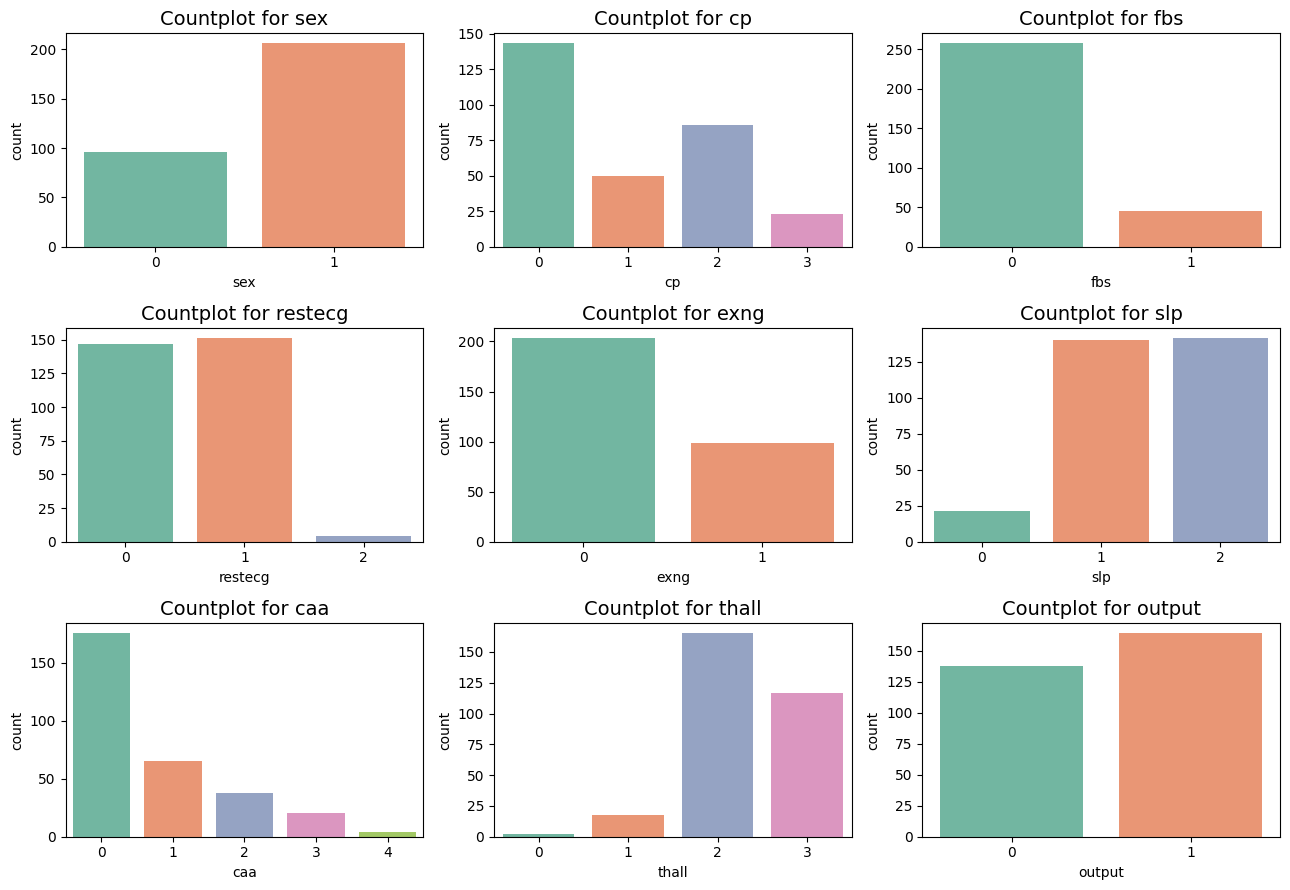

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(13, 9))
#Looping through the subplots and create countplots for each feature

for i, ax in enumerate(axes.flat):
    #if i < len(cat_features):
        sns.countplot(data=df, x=cat_features[i], ax=ax, palette='Set2', orient='h')
        ax.set_title(f'Countplot for {cat_features[i]}', fontsize=14)

# Adjusting the layout for better visualization
plt.tight_layout()

plt.show()

**Exploration (Continuous) Features**

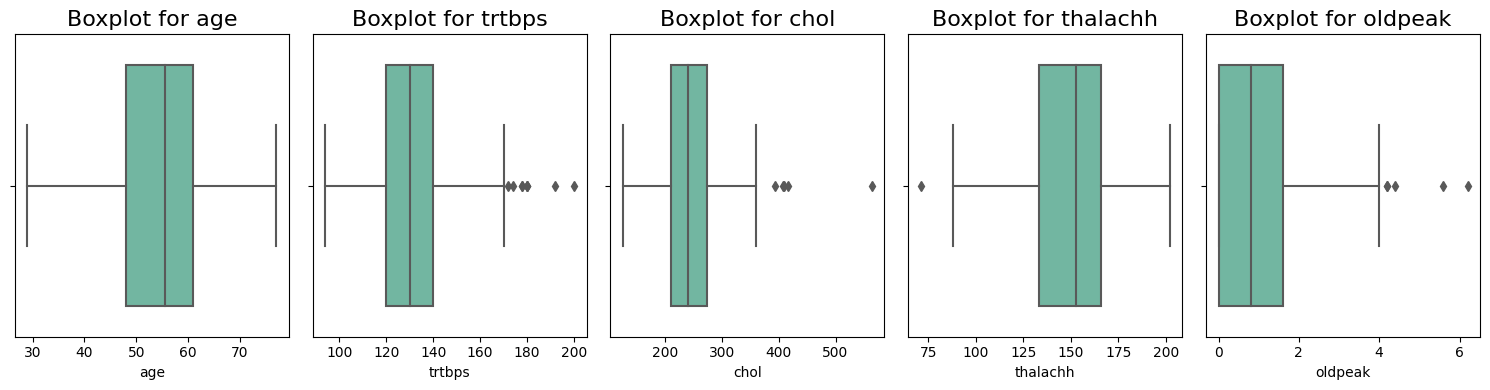

In [26]:
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

# Creating a list of categorical features
cont_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

#Looping through the subplots and create countplots for each feature
for i, ax in enumerate(axes.flat):
    if i < len(cont_features):
        sns.boxplot(data=df, x=cont_features[i], ax=ax, palette='Set2', orient='h')
        ax.set_title(f'Boxplot for {cont_features[i]}', fontsize=16)

# Adjusting the layout for better visualization
plt.tight_layout()

plt.show()

**Skewed Continuous Features Explorationt**

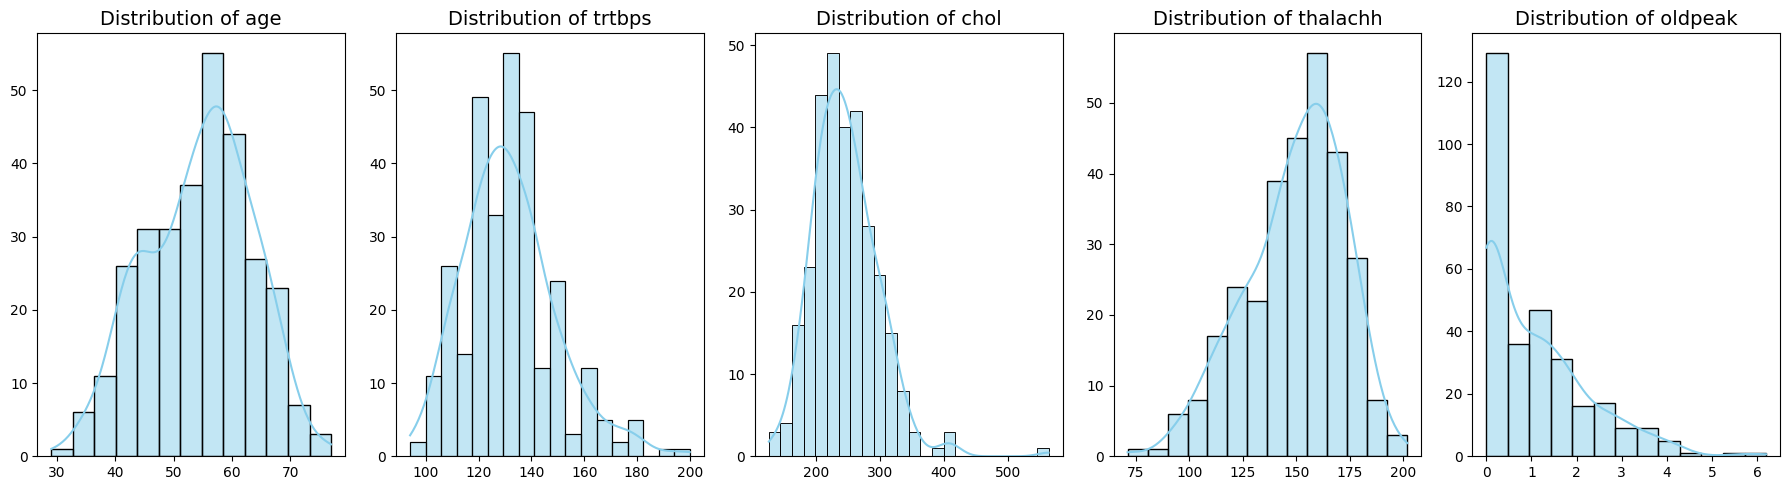

In [27]:
cont_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
fig, axes = plt.subplots(ncols=len(cont_columns), figsize=(18, 5))

# Plot distribution plots for each skewed column
for i, column in enumerate(cont_columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

**Correlation Matrix Summary**

In [28]:
# Calculating the correlation matrix for your DataFrame
correlation_matrix = df.corr()

# Creating a heatmap using Plotly Express to visualize the correlation matrix
fig = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale='Viridis')

# Customizing the layout of the heatmap
fig.update_layout(
    title="Correlation Matrix",
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis_showticklabels=True,
    yaxis_showticklabels=True,
    autosize=False,
    width=950,
    height=950,
)

# Increase the font size of the text inside the squares
fig.update_traces(textfont=dict(size=7))

# Display the heatmap
fig.show()

In [29]:
# Creating a histogram using Plotly Express to visualize the relationship between age and the risk of heart attack
fig = px.histogram(df, x='age', color='output', title='The Effect of Age on Risk of Heart Attack (Output)',
                   labels={'age': 'Age', 'output': 'Output'},
                   marginal='box', barmode='group',
                   color_discrete_sequence=['#1f77b4', '#ff7f0e']
                   )

# Customizing the layout of the histogram
fig.update_layout(
    xaxis=dict(tickmode='linear', dtick=5),  # Adjusting x-axis tick settings
    bargap=0.1  # Setting the gap between bars
)

# Customizing the appearance of the data points (bars)
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# Customizing gridlines on the plot
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

# Customizing the title and its position
fig.update_layout(title_font=dict(size=18), title_x=0.5, title_y=0.95)

# Customizing the background colors
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

fig.show()

**Data Preprocessing**

In [30]:
# checking for missing values in data
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [31]:
# First we extract the x Featues and y Label
x = df.drop(['output'], axis=1)
y = df['output']

In [32]:
x.shape, y.shape

((302, 13), (302,))

In [33]:
# Then we Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 241 samples.
Testing set has 61 samples.


In [34]:
cont_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Creating a StandardScaler instance
scaler = StandardScaler()

# Fitting the StandardScaler on the training data
scaler.fit(X_train[cont_features])

# Transforming (standardize) the continuous features in the training and testing data
X_train_cont_scaled = scaler.transform(X_train[cont_features])
X_test_cont_scaled = scaler.transform(X_test[cont_features])

# Replacing the scaled continuous features in the original data
X_train[cont_features] = X_train_cont_scaled
X_test[cont_features] = X_test_cont_scaled

X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
74,-1.305050,0,2,-0.559889,-0.632873,0,1,0.658687,0,-0.731051,1,0,2
153,1.259251,0,2,0.816981,0.594254,0,0,0.108229,0,-0.898287,1,1,2
64,0.367320,1,2,0.472763,-0.670631,1,0,0.658687,0,-0.898287,2,0,2
296,0.924777,0,0,-0.445150,-0.934935,0,1,-0.569257,1,-0.898287,1,0,2
288,0.255829,1,0,-1.248324,1.670349,0,1,-0.272857,1,1.610255,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0.813285,0,0,0.358024,0.896316,1,1,-1.839544,0,0.690456,1,3,2
193,0.590303,1,0,0.759611,0.669769,0,0,-0.315200,1,1.443019,1,2,3
117,0.144337,1,3,-0.674628,-1.010450,0,0,0.531658,0,0.690456,1,0,3
47,-0.859085,1,2,0.358024,0.197797,0,0,0.277601,0,-0.898287,2,0,2


In [35]:
# Below is the classification models we will be using
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

# Creating lists for classifier names, test_accuracy_scores and their F1 scores.
classifier_names = []
test_accuracy_scores = []
f1_scores = []

# Looping through classifiers, fitting models, and calculating train and test accuracy
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Storing classifier names.
    classifier_names.append(name)

    # Calculating and storing F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Calculating and storing test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    test_accuracy_scores.append(test_accuracy)

    # Printing model details
    print(f'Model: {name}')
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print('------------------------------------------------------------------')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print('------------------------------------------------------------------')
    print(f'Testing Classification report: \n{classification_report(y_test, y_pred)}')
    print('------------------------------------------------------------------\n')

Model: Logistic Regression
Training Accuracy: 0.8423236514522822
Testing Accuracy: 0.8688524590163934
------------------------------------------------------------------
Testing Confusion Matrix: 
[[22  5]
 [ 3 31]]
------------------------------------------------------------------
Testing Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

------------------------------------------------------------------

Model: K-Nearest Neighbors
Training Accuracy: 0.8506224066390041
Testing Accuracy: 0.9016393442622951
------------------------------------------------------------------
Testing Confusion Matrix: 
[[24  3]
 [ 3 31]]
------------------------------------------------------------------
Testing C

In [36]:
# Creating a DataFrame from the data
data = pd.DataFrame({'Classifier': classifier_names, 'Test Accuracy': test_accuracy_scores})

# Creating Plotly bar chart
fig = px.bar(data, x='Test Accuracy', y='Classifier', orientation='h', color='Test Accuracy',
             title='Test Accuracy Scores by Classifiers', text='Test Accuracy', color_continuous_scale='viridis')

# Customizing the layout
fig.update_layout(
    xaxis_title='Test Accuracy',
    yaxis_title='Classifier',
    xaxis=dict(range=[0, 1]),
    yaxis=dict(categoryorder='total ascending'),
    showlegend=False,
    height=600,
    width=900
)

fig.show()

In [37]:
# Creating a DataFrame from the data
data = pd.DataFrame({'Classifier': classifier_names, 'F1-Score': f1_scores})

# Creating Plotly bar chart
fig = px.bar(data, x='F1-Score', y='Classifier', orientation='h', color='F1-Score',
             title='F1-Score by Classifiers', text='F1-Score', color_continuous_scale='viridis')

# Customizing the layout
fig.update_layout(
    xaxis_title='F1-Score',
    yaxis_title='Classifier',
    xaxis=dict(range=[0, 1]),
    yaxis=dict(categoryorder='total ascending'),
    showlegend=False,
    height=600,
    width=900
)

fig.show()

In [38]:
# Defining the hyperparameters and their possible values
parameters =  {
              'n_estimators' :[40,50,60,70,80,90],
              "learning_rate": np.arange(1, 10, 1)
              }

ada=AdaBoostClassifier()

# Creating a GridSearchCV object
grid_search = GridSearchCV(ada, parameters, cv=10, n_jobs=-1)

# Fitting the model to the data
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters and their corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Using the best model for predictions
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)
print("AdaBoost's tuned test accuracy is", accuracy_score(y_test, y_pred))

Best Parameters:  {'learning_rate': 1, 'n_estimators': 40}
Best Score:  0.7798333333333334
AdaBoost's tuned test accuracy is 0.9180327868852459


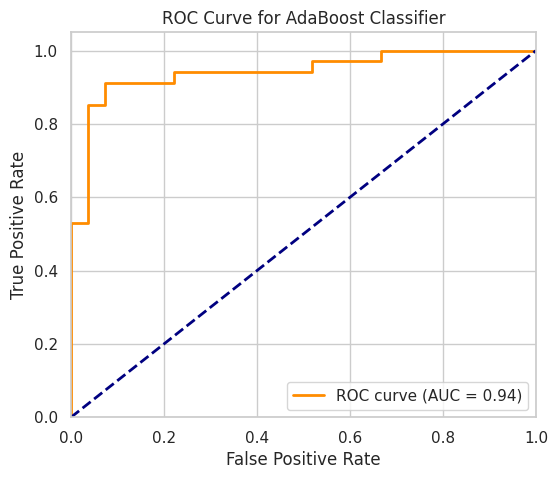

In [39]:
# Fitting the AdaBoostClassifier on training data
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

# Predicting probabilities for the positive class
y_pred_prob = ada.predict_proba(X_test)[:, 1]

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculating the AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Plotting the ROC curve
sns.set(style='whitegrid')
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost Classifier')
plt.legend(loc='lower right')
plt.show()